In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


## Load CSV file into memory

In [7]:
data = pandas.read_csv('dataset/uber-raw-data-apr14.csv')

In [8]:
data.shape

(1129032, 4)

In [9]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1129027,4/30/2014 23:22:00,40.7640,-73.9744,B02764
1129028,4/30/2014 23:26:00,40.7629,-73.9672,B02764
1129029,4/30/2014 23:31:00,40.7443,-73.9889,B02764
1129030,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [10]:
dt = '4/30/2014 23:22:00'

In [11]:
dt = pandas.to_datetime(dt)

In [15]:
%timeit data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

2.57 s ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
type(data['Date/Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
def get_dow(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['dom'] = data['Date/Time'].map(get_dow)
data['Weekday'] = data['Date/Time'].map(get_weekday)
data['Hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
1129027,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
1129028,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
1129029,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
1129030,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
1129031,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [19]:
data.head()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


# analysis

## analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

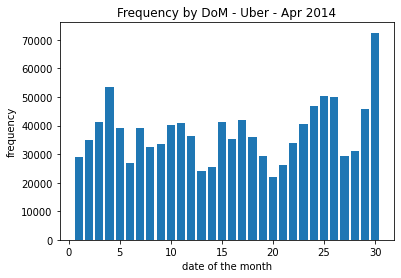

In [26]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber - Apr 2014')

In [32]:
for k, rows in data.groupby('dom'):
    print(k, len(rows))

1 29092
2 34948
3 41402
4 53428
5 39042
6 26890
7 39100
8 32376
9 33686
10 40082
11 40840
12 36340
13 24224
14 25348
15 41282
16 35434
17 41946
18 36148
19 29204
20 22034
21 26324
22 33950
23 40692
24 46704
25 50190
26 49850
27 29354
28 30950
29 45670
30 72502


In [30]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

by_date

dom
1     29092
2     34948
3     41402
4     53428
5     39042
6     26890
7     39100
8     32376
9     33686
10    40082
11    40840
12    36340
13    24224
14    25348
15    41282
16    35434
17    41946
18    36148
19    29204
20    22034
21    26324
22    33950
23    40692
24    46704
25    50190
26    49850
27    29354
28    30950
29    45670
30    72502
dtype: int64

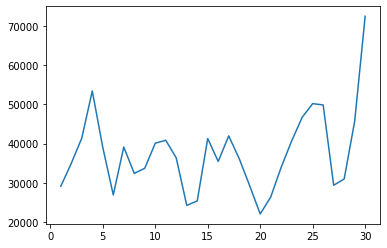

In [33]:
plot(by_date)

<BarContainer object of 30 artists>

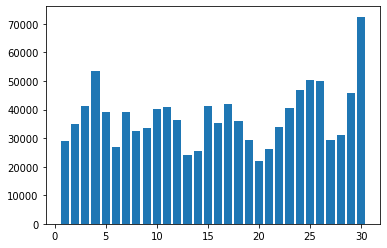

In [34]:
bar(range(1,31), by_date)

In [35]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    22034
13    24224
14    25348
21    26324
6     26890
1     29092
19    29204
27    29354
28    30950
8     32376
9     33686
22    33950
2     34948
16    35434
18    36148
12    36340
5     39042
7     39100
10    40082
23    40692
11    40840
15    41282
3     41402
17    41946
29    45670
24    46704
26    49850
25    50190
4     53428
30    72502
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

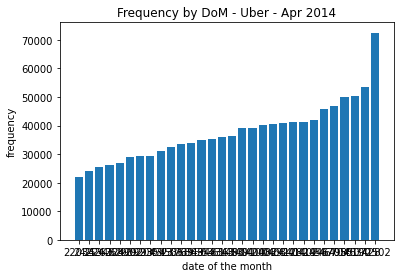

In [40]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted);
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber - Apr 2014')

## analysis by hour

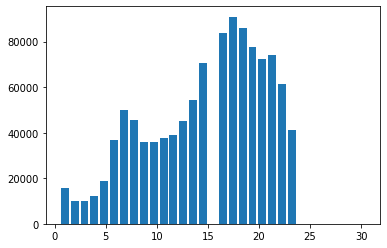

In [48]:
hist(data.Hour, bins=31, rwidth=.8, range=(0.5, 30.5));

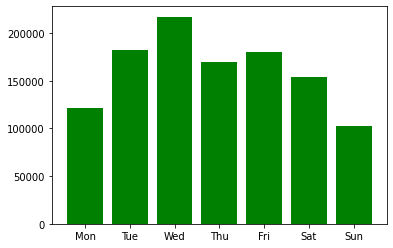

In [53]:
hist(data.Weekday, bins=7, rwidth=.8, range=(-0.5, 6.5), color='green');
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

## cross analysis (hour, dow)

In [57]:
by_cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

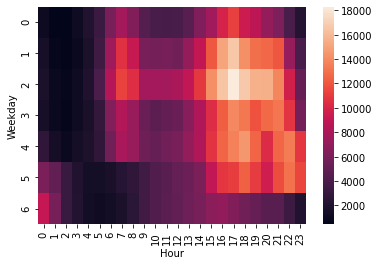

In [58]:
seaborn.heatmap(by_cross)